In [74]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

pd.set_option('display.max_columns', None)

In [3]:
mpl.rc('font', family='NanumGothic')
mpl.rc('axes', unicode_minus=False)

In [4]:
data = pd.read_csv('./data/사전과제_data(대외비).csv')

In [5]:
data = data.dropna() #결측치 제거

In [6]:
data.describe()

,Power,DPT,HCDC,LCDC,MCDC,MXGUST,N50MU,N50MV,NCPCP,NDNSW,PRES,PRMSL,RH,SNOL,SPFH,SWDIF,SWDIR,TCAR,TDSWS,TMAX,TMIN,TMP,UGRD,VGRD,VIS
count,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000
mean,10489.726042,282.613733,0.297816,0.311693,0.226534,8.514256,1.703122,-0.497501,0.144576,163.955344,101572.642926,101604.898699,77.585871,0.001651,0.008702,63.394058,114.321061,0.693976,177.676412,286.802096,286.399237,288.528413,0.924964,-0.965852,24713.720017
std,16265.017218,9.516462,0.369968,0.372055,0.355870,4.689025,4.653624,5.370105,1.404132,245.436310,862.941092,863.646625,13.563617,0.033077,0.005173,90.200236,208.266613,0.407181,263.125027,8.456487,8.491048,7.353683,3.695723,4.445996,16993.617704
min,0.000000,257.834350,0.000000,0.000000,0.000000,0.789551,-21.822517,-21.447340,0.000000,0.000000,97939.086000,97964.180000,30.477089,0.000000,0.001178,0.000000,0.000000,0.000000,0.000000,267.138550,266.406220,275.928280,-18.615330,-18.573994,19.106869
25%,0.000000,274.918835,0.000000,0.000000,0.000000,5.037655,-1.135010,-4.172215,0.000000,0.000000,100903.970000,100934.805000,66.815433,0.000000,0.004302,0.000000,0.000000,0.278564,0.000000,279.522335,279.146572,281.285500,-1.444218,-3.791789,11360.670250
50%,0.000000,282.345200,0.062500,0.101501,0.000000,7.480424,1.527756,-0.938543,0.000000,5.501953,101636.750000,101677.805000,78.428546,0.000000,0.007131,5.524490,0.000000,0.982147,6.096680,287.079695,286.631680,288.640670,0.743261,-1.337835,21077.447500
75%,16994.625250,291.462378,0.591835,0.631432,0.380135,10.870264,4.403746,2.647588,0.000000,272.998857,102239.610000,102270.630000,88.971813,0.000000,0.013141,99.369844,130.015625,1.000000,301.744157,294.685203,294.326908,295.536107,3.159547,1.662547,34966.373750
max,63475.351000,299.287320,1.000006,1.000000,1.000000,38.869167,25.704344,30.286469,54.830078,980.527830,103644.550000,103673.340000,104.500310,2.016602,0.021400,529.763610,936.984380,1.000008,1035.399200,304.775630,304.524960,302.365600,19.557364,25.152510,93041.609000


In [7]:
#분산이 작은거 다 버려 , 분산이 작지만 값이 치우친건 남기기
data = data.drop(['DPT','N50MU', 'N50MV', 'TMAX','TMIN', 'NDNSW', 'PRMSL', 'HCDC','MCDC','LCDC','VGRD','SPFH','UGRD','SWDIF','SWDIR','VIS' ], axis=1)
data

,datetime,Power,MXGUST,NCPCP,PRES,RH,SNOL,TCAR,TDSWS,TMP
0,2019-06-28 0:00,0.000,3.682800,0.0,100128.39,95.563927,0.0,0.820679,0.000000,293.66138
1,2019-06-28 1:00,0.000,5.553069,0.0,100141.63,96.102135,0.0,0.888611,0.000000,293.68283
2,2019-06-28 2:00,0.000,6.369141,0.0,100132.73,97.152420,0.0,0.987091,0.000000,293.72989
3,2019-06-28 3:00,0.000,6.471650,0.0,100121.87,97.398071,0.0,0.987091,0.000000,293.70828
4,2019-06-28 4:00,0.000,6.159808,0.0,100135.45,97.384186,0.0,0.974213,0.000000,293.68655
...,...,...,...,...,...,...,...,...,...,...
22657,2022-03-24 19:00,26.689,7.390634,0.0,101961.50,91.081940,0.0,0.937500,42.282314,278.92712
22658,2022-03-24 20:00,0.000,7.339590,0.0,102008.12,90.620232,0.0,1.000000,0.000000,278.81909
22659,2022-03-24 21:00,0.000,5.271782,0.0,102078.44,90.612701,0.0,1.000000,0.000000,278.75012
22660,2022-03-24 22:00,0.000,4.706657,0.0,102095.90,90.754486,0.0,1.000000,0.000000,278.83649


In [8]:
data.describe()

,Power,MXGUST,NCPCP,PRES,RH,SNOL,TCAR,TDSWS,TMP
count,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000
mean,10489.726042,8.514256,0.144576,101572.642926,77.585871,0.001651,0.693976,177.676412,288.528413
std,16265.017218,4.689025,1.404132,862.941092,13.563617,0.033077,0.407181,263.125027,7.353683
min,0.000000,0.789551,0.000000,97939.086000,30.477089,0.000000,0.000000,0.000000,275.928280
25%,0.000000,5.037655,0.000000,100903.970000,66.815433,0.000000,0.278564,0.000000,281.285500
50%,0.000000,7.480424,0.000000,101636.750000,78.428546,0.000000,0.982147,6.096680,288.640670
75%,16994.625250,10.870264,0.000000,102239.610000,88.971813,0.000000,1.000000,301.744157,295.536107
max,63475.351000,38.869167,54.830078,103644.550000,104.500310,2.016602,1.000008,1035.399200,302.365600


In [9]:
data['datetime']=pd.to_datetime(data['datetime'])

In [10]:
data.head()

,datetime,Power,MXGUST,NCPCP,PRES,RH,SNOL,TCAR,TDSWS,TMP
0,2019-06-28 00:00:00,0.0,3.682800,0.0,100128.39,95.563927,0.0,0.820679,0.0,293.66138
1,2019-06-28 01:00:00,0.0,5.553069,0.0,100141.63,96.102135,0.0,0.888611,0.0,293.68283
2,2019-06-28 02:00:00,0.0,6.369141,0.0,100132.73,97.152420,0.0,0.987091,0.0,293.72989
3,2019-06-28 03:00:00,0.0,6.471650,0.0,100121.87,97.398071,0.0,0.987091,0.0,293.70828
4,2019-06-28 04:00:00,0.0,6.159808,0.0,100135.45,97.384186,0.0,0.974213,0.0,293.68655


In [11]:
# datetime을 인덱스로
data.set_index('datetime', inplace=True)

In [12]:
data.head()

,Power,MXGUST,NCPCP,PRES,RH,SNOL,TCAR,TDSWS,TMP
datetime,,,,,,,,,
2019-06-28 00:00:00,0.0,3.682800,0.0,100128.39,95.563927,0.0,0.820679,0.0,293.66138
2019-06-28 01:00:00,0.0,5.553069,0.0,100141.63,96.102135,0.0,0.888611,0.0,293.68283
2019-06-28 02:00:00,0.0,6.369141,0.0,100132.73,97.152420,0.0,0.987091,0.0,293.72989
2019-06-28 03:00:00,0.0,6.471650,0.0,100121.87,97.398071,0.0,0.987091,0.0,293.70828
2019-06-28 04:00:00,0.0,6.159808,0.0,100135.45,97.384186,0.0,0.974213,0.0,293.68655


In [13]:
data=data.resample('M').mean()
data.head()

,Power,MXGUST,NCPCP,PRES,RH,SNOL,TCAR,TDSWS,TMP
datetime,,,,,,,,,
2019-06-30,8958.122653,6.071061,0.521688,99961.406208,92.854820,0.0,0.933025,198.038739,294.308734
2019-07-31,9953.781038,7.939401,0.244348,100518.541419,88.812072,0.0,0.864265,223.616064,296.116233
2019-08-31,12100.691765,7.207507,0.155813,100565.932042,79.175224,0.0,0.662120,245.549793,299.751452
2019-09-30,8740.986382,7.822166,0.301978,101335.873807,80.277584,0.0,0.769395,148.337473,296.606640
2019-10-31,11095.303841,7.764672,0.137211,101814.464767,72.515549,0.0,0.559278,160.627175,292.482751


In [14]:
data.shape

(34, 9)

In [15]:
# 인덱스를 칼럼으로 추가 
data['datetime']=data.index

In [16]:
data.head()

,Power,MXGUST,NCPCP,PRES,RH,SNOL,TCAR,TDSWS,TMP,datetime
datetime,,,,,,,,,,
2019-06-30,8958.122653,6.071061,0.521688,99961.406208,92.854820,0.0,0.933025,198.038739,294.308734,2019-06-30
2019-07-31,9953.781038,7.939401,0.244348,100518.541419,88.812072,0.0,0.864265,223.616064,296.116233,2019-07-31
2019-08-31,12100.691765,7.207507,0.155813,100565.932042,79.175224,0.0,0.662120,245.549793,299.751452,2019-08-31
2019-09-30,8740.986382,7.822166,0.301978,101335.873807,80.277584,0.0,0.769395,148.337473,296.606640,2019-09-30
2019-10-31,11095.303841,7.764672,0.137211,101814.464767,72.515549,0.0,0.559278,160.627175,292.482751,2019-10-31


In [17]:
data.describe()

,Power,MXGUST,NCPCP,PRES,RH,SNOL,TCAR,TDSWS,TMP
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,10363.545763,8.514544,0.149137,101563.121347,77.889089,0.002160,0.703237,175.493190,288.164073
std,1947.577916,1.543510,0.172726,757.562935,8.330693,0.006012,0.124500,53.047029,7.416185
min,7158.481855,6.071061,0.000000,99961.406208,65.942486,0.000000,0.419476,90.967408,277.693611
25%,8635.450458,7.633997,0.028634,100791.589827,71.140489,0.000000,0.628176,133.879209,280.750724
50%,10408.287431,8.165693,0.090541,101737.972618,76.072605,0.000000,0.685547,172.442337,287.865704
75%,11578.689514,9.352929,0.176568,102289.008105,84.877553,0.000019,0.799939,225.917337,295.238964
max,15790.378753,11.428454,0.729318,102498.997179,92.854820,0.023212,0.933025,281.088153,299.751452


- 3~5월   봄  -> 0
- 6~8월  여름 -> 1
- 9~11월 가을 -> 2              
- 12~2월 겨울 -> 3                 

In [18]:
# 월추출하기
a=data['datetime'].dt.month

In [19]:
target_list = []

for i in a:    
    if  5 < i < 9:
        target_list.append(1)    
    elif 9 < i < 12:
        target_list.append(2)
    elif 2 < i < 6:
        target_list.append(0)
    else:
        target_list.append(3)            
    
print(target_list)

[1, 1, 1, 3, 2, 2, 3, 3, 3, 0, 0, 0, 1, 1, 1, 3, 2, 2, 3, 3, 3, 0, 0, 0, 1, 1, 1, 3, 2, 2, 3, 3, 3, 0]


In [20]:
target=pd.DataFrame(target_list, index=data.index)
target.head()

,0
datetime,
2019-06-30,1
2019-07-31,1
2019-08-31,1
2019-09-30,3
2019-10-31,2


In [21]:
data_season=pd.concat([data,target], axis=1)
data_season.head()

,Power,MXGUST,NCPCP,PRES,RH,SNOL,TCAR,TDSWS,TMP,datetime,0
datetime,,,,,,,,,,,
2019-06-30,8958.122653,6.071061,0.521688,99961.406208,92.854820,0.0,0.933025,198.038739,294.308734,2019-06-30,1
2019-07-31,9953.781038,7.939401,0.244348,100518.541419,88.812072,0.0,0.864265,223.616064,296.116233,2019-07-31,1
2019-08-31,12100.691765,7.207507,0.155813,100565.932042,79.175224,0.0,0.662120,245.549793,299.751452,2019-08-31,1
2019-09-30,8740.986382,7.822166,0.301978,101335.873807,80.277584,0.0,0.769395,148.337473,296.606640,2019-09-30,3
2019-10-31,11095.303841,7.764672,0.137211,101814.464767,72.515549,0.0,0.559278,160.627175,292.482751,2019-10-31,2


In [22]:
data_season.rename(columns = {0:'season'}, inplace=True)
data_season.head()

,Power,MXGUST,NCPCP,PRES,RH,SNOL,TCAR,TDSWS,TMP,datetime,season
datetime,,,,,,,,,,,
2019-06-30,8958.122653,6.071061,0.521688,99961.406208,92.854820,0.0,0.933025,198.038739,294.308734,2019-06-30,1
2019-07-31,9953.781038,7.939401,0.244348,100518.541419,88.812072,0.0,0.864265,223.616064,296.116233,2019-07-31,1
2019-08-31,12100.691765,7.207507,0.155813,100565.932042,79.175224,0.0,0.662120,245.549793,299.751452,2019-08-31,1
2019-09-30,8740.986382,7.822166,0.301978,101335.873807,80.277584,0.0,0.769395,148.337473,296.606640,2019-09-30,3
2019-10-31,11095.303841,7.764672,0.137211,101814.464767,72.515549,0.0,0.559278,160.627175,292.482751,2019-10-31,2


In [23]:
data_season1 = data_season.drop(['datetime' ], axis=1)
data_season1

,Power,MXGUST,NCPCP,PRES,RH,SNOL,TCAR,TDSWS,TMP,season
datetime,,,,,,,,,,
2019-06-30,8958.122653,6.071061,0.521688,99961.406208,92.854820,0.000000,0.933025,198.038739,294.308734,1
2019-07-31,9953.781038,7.939401,0.244348,100518.541419,88.812072,0.000000,0.864265,223.616064,296.116233,1
2019-08-31,12100.691765,7.207507,0.155813,100565.932042,79.175224,0.000000,0.662120,245.549793,299.751452,1
2019-09-30,8740.986382,7.822166,0.301978,101335.873807,80.277584,0.000000,0.769395,148.337473,296.606640,3
2019-10-31,11095.303841,7.764672,0.137211,101814.464767,72.515549,0.000000,0.559278,160.627175,292.482751,2
2019-11-30,9223.335499,9.406134,0.085150,102159.732847,69.053533,0.000000,0.594985,126.514020,287.821741,2
2019-12-31,7341.481536,10.429922,0.031313,102459.571640,71.268400,0.000155,0.710750,94.355636,282.970842,3
2020-01-31,8008.542502,8.744028,0.091674,102332.099858,70.520415,0.000025,0.747738,109.367072,279.859555,3
2020-02-29,10542.145042,8.728624,0.124169,102377.320474,77.951314,0.002519,0.607991,152.831334,278.714999,3


In [24]:
data_season1.shape

(34, 10)

In [25]:
feature_columns = list(data_season1.columns.difference(['Power']))
feature_columns

['MXGUST', 'NCPCP', 'PRES', 'RH', 'SNOL', 'TCAR', 'TDSWS', 'TMP', 'season']

In [26]:
X = data_season1[feature_columns] 
X

,MXGUST,NCPCP,PRES,RH,SNOL,TCAR,TDSWS,TMP,season
datetime,,,,,,,,,
2019-06-30,6.071061,0.521688,99961.406208,92.854820,0.000000,0.933025,198.038739,294.308734,1
2019-07-31,7.939401,0.244348,100518.541419,88.812072,0.000000,0.864265,223.616064,296.116233,1
2019-08-31,7.207507,0.155813,100565.932042,79.175224,0.000000,0.662120,245.549793,299.751452,1
2019-09-30,7.822166,0.301978,101335.873807,80.277584,0.000000,0.769395,148.337473,296.606640,3
2019-10-31,7.764672,0.137211,101814.464767,72.515549,0.000000,0.559278,160.627175,292.482751,2
2019-11-30,9.406134,0.085150,102159.732847,69.053533,0.000000,0.594985,126.514020,287.821741,2
2019-12-31,10.429922,0.031313,102459.571640,71.268400,0.000155,0.710750,94.355636,282.970842,3
2020-01-31,8.744028,0.091674,102332.099858,70.520415,0.000025,0.747738,109.367072,279.859555,3
2020-02-29,8.728624,0.124169,102377.320474,77.951314,0.002519,0.607991,152.831334,278.714999,3


## Decision Tree 적용

In [27]:
X = data_season1[feature_columns]   #설명변수
y = data_season1['Power']    #타겟변수
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.05, 
                                                    shuffle=False,
                                                    random_state = 42) 
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape) # 데이터 개수 확인

(32, 9) (2, 9) (32,) (2,)


In [84]:
regr1 = tree.DecisionTreeRegressor(max_depth=1)
regr2 = tree.DecisionTreeRegressor(max_depth=5)
regr3 = tree.DecisionTreeRegressor(max_depth=10)
regr4 = tree.DecisionTreeRegressor(max_depth=15)

In [85]:
regr1.fit(X, y)

DecisionTreeRegressor(max_depth=1)

In [69]:
regr2.fit(X, y)

DecisionTreeRegressor(max_depth=5)

In [70]:
regr3.fit(X, y)

DecisionTreeRegressor(max_depth=10)

In [71]:
regr4.fit(X, y)

DecisionTreeRegressor(max_depth=15)

In [72]:
y_1 = regr1.predict(test_x)
y_2 = regr2.predict(test_x)
y_3 = regr3.predict(test_x)
y_4 = regr4.predict(test_x)

In [73]:
print(y_1)
print(y_2)
print(y_3)
print(y_4)

[9579.1768664 9579.1768664]
[11775.83461526 10840.13990443]
[12088.12360417 10340.73507824]
[12088.12360417 10340.73507824]


In [48]:
test_y

datetime
2022-02-28    12088.123604
2022-03-31    10340.735078
Freq: M, Name: Power, dtype: float64

In [82]:
import io
import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz


def draw_decision_tree(model):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf, feature_names=feature_columns)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)

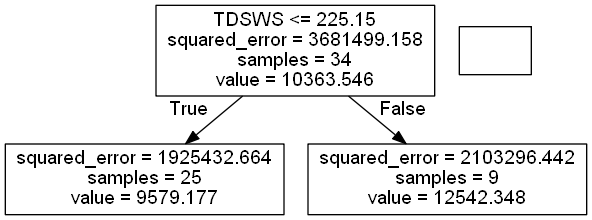

In [86]:
draw_decision_tree(regr1)